<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/Caracterizaci%C3%B3n_de_lo_distribuci%C3%B3n_de_perdida_R_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una empresa del sector asegurador a creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización. De acuerdo con la base de datos, la empresa quiere llevar a cabo la caracterización de la distribución agregada de sus pérdidas.

Para la caracterización de la distribución agregada de pérdidas es necesario tener en cuenta las siguientes métricas:

* Error asociado con la muestra de los datos. (Tamaño de la Muestra).
* Media = 1.78
* Varianza = 0.14
* Coeficiente de Asimetría = 3.58
* Coeficiente de Kurtosis = 31.73
Llevar a cabo el proceso de muestreo aleatorio de la variable a una confiabilidad del 99.9% según los acuerdos de Basilea mediante la utilización del método de Montecarlo.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  #Libreria para la grafica de distribución

#Para carga automatica de datos
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Variables description

* **Fechas:** Semana en la cual ocurrieron los accicentes.
* **Eventos:**Numero de eventos ocurridos.
* **Transacción promedio:** Es el monto promedio de los eventos realizados.
* **Eventos-fallo:** Es el numero de fallos que ocurrieron.
* **Pérdida promedio:** Es el monto promedio del evento de fallo.

In [ ]:
nxl='/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Integración de datos y prospectiva/Reto #1-Caracterización y muestreo de variables aleatorias/1. AdmonEjecProcesos.xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB.head(100) #mostrar los primero 100 datos

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas,Valor Generado (millones),Perdida ($),Unnamed: 6,Unnamed: 7,Perdidad ($),Unnamed: 9,Unnamed: 10,LI,LS,ND,% ND,Valor Central,Varianza
0,2010-01-01,44,358.3637,5,0.079029,0.395144,NaN,Max,34.822156,NaN,1.0,0,3.482216,346,0.988571,1.741108,0.001584
1,2010-01-02,43,742.8517,7,0.021259,0.148815,NaN,Min,0.000000,NaN,2.0,3.482216,6.964431,4,0.011429,5.223323,11.850248
2,2010-01-03,55,646.6903,9,0.038818,0.349362,NaN,Rango,34.822156,NaN,3.0,6.964431,10.446647,0,0,8.705539,47.950563
3,2010-01-04,59,653.5397,3,0.035956,0.107869,NaN,NI,10.000000,NaN,4.0,10.446647,13.928862,0,0,12.187755,108.302529
4,2010-01-05,52,636.6142,4,0.204951,0.819804,NaN,Tamalo int,3.482216,NaN,5.0,13.928862,17.411078,0,0,15.66997,192.906147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2010-04-06,50,441.8036,10,0.206232,2.062324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2010-04-07,48,552.9503,7,0.019812,0.138682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2010-04-08,58,453.7787,6,0.054705,0.328230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2010-04-09,49,596.0837,6,0.006537,0.039223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Caracterización de la distribución de las perdidas (LDA)

Es un modelo matematico que se utiliza para estimar las perdidas potenciales por riesgo operacional, se basa en la combinación de dos parametros clave:

- Frecuencia: La cantidad de veces que se repite un evento dentro de un tiempo determinado.
- Severidad: El monto de las perdidas generadas por cada evento de riesgo.

In [ ]:
#Tomamos las variables de interes
Xev=XDB.iloc[:,3] #Variable eventos semanales - Frecuencia
Xsev=XDB.iloc[:,4] #perdidas promedio por evento - Severidad

In [ ]:
LDA=np.multiply(Xev,Xsev)

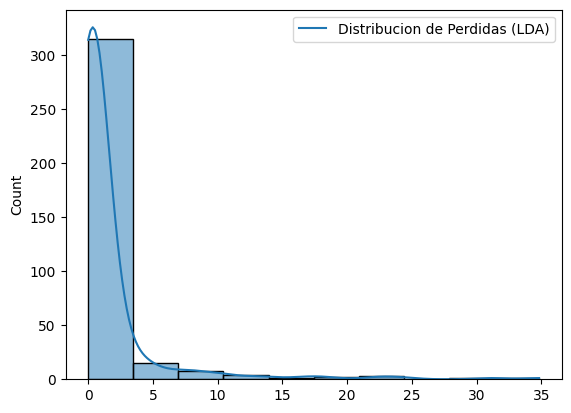

In [ ]:
#graficamos la distribucion de las perdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10)
#bins agrupar los datos en 10 intervalos
plt.legend(['Distribucion de Perdidas (LDA)'])
plt.show()

## Error de muestreo

Debido a que no tenemos acceso a la población total, sacamos el error estandar, usando unicamente la muestra.

In [ ]:
std=np.std(LDA) # Calcula la desviación estándar de LDA

#Error muestreo
error_muestreo=std/np.sqrt(len(LDA))  # std es la desviación estándar, LDA son los datos, coeficiente de variacion en otras palabras
print("Error de muestreo:", error_muestreo) #Error de muestreo = (Desviación estándar de la muestra) / √(Tamaño de la muestra)

Error de muestreo: 0.21425534373123237


Observación: Lo ideal es que el error de muestreo sea lo mas cercano a 0, de esta forma estamos mas seguros de que la muestre es una mejor representación de la población.

In [ ]:
counts,bin_edges=np.histogram(LDA,bins=10)
print("Los datos por intervalo son:\n", counts)
print("Los limites de los intervalos son:\n",bin_edges)

Los datos por intervalo son:
 [315  15   8   4   1   2   3   0   1   1]
Los limites de los intervalos son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057 34.82215619]


## Los datos centrales - Marcas de clase

Una marca de clase es un valor que representa cada intervalo o clase, de esta forma, a pesar de que no conoces exactamente todos los valores del intervalo esta marca de clase te permitir analizar el intervalo.

In [ ]:
#Limites inferiores bin_edges[:-1]
#Limites superiores bin_edges[1:]
mc = (bin_edges[:-1] + bin_edges[1:]) / 2
print("los valores centrales de la clase son:\n", mc)

los valores centrales de la clase son:
 [ 1.74110781  5.22332343  8.70553905 12.18775467 15.66997029 19.15218591
 22.63440152 26.11661714 29.59883276 33.08104838]


In [ ]:
#Los datos que hay por intervalo, la variable counts se define mas arriba
fp=counts/sum(counts)
print("Los datos por intervalo son:\n", fp)

Los datos por intervalo son:
 [0.9        0.04285714 0.02285714 0.01142857 0.00285714 0.00571429
 0.00857143 0.         0.00285714 0.00285714]


# Medidas de tendencia central
* Media
* Varianza
* Coeficiente de asimetria
* Coeficiente de kurtosis


In [ ]:
#Media
u=np.sum(np.multiply(mc,fp))
print("La media de los datos es:",u)

#Desviación-estándar (varianza)
var=np.sum(np.multiply((mc-u)**2,fp)) #Suma producto del Excel
print("La varianza de los datos es:",var)
std=np.sqrt(var)
print("La desviación estándar de los datos es:", std)

#Coeficiente de asimetría
cas=np.sum(np.multiply(((mc-u)/std)**3,fp))
print("El coeficiente de asimetría de los datos es:",cas)

#Coeficiente de kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print("El coeficiente de kurtosis de los datos es:",ck)

La media de los datos es: 2.656433058055811
La varianza de los datos es: 13.089556542674002
La desviación estándar de los datos es: 3.6179492178130417
El coeficiente de asimetría de los datos es: 5.313307467317224
El coeficiente de kurtosis de los datos es: 31.735556826670006


In [ ]:
from scipy.stats import skew,kurtosis

LDAdf=pd.DataFrame(LDA)
LDAm=LDAdf.sample(n=1000,replace=True)


print('El coeficiente de asimetria de los datos es:', skew(LDAm))
print('El coeficiente de kurtosis de los datos es:', kurtosis(LDAm))

print("la variacion del coeficiente de asimetria es:",(cas-skew(LDAm))/cas)
print("La variacion del coeficiente de curtosis es:",(ck-kurtosis(LDAm))/ck)

El coeficiente de asimetria de los datos es:
 [4.6447561]
El coeficiente de kurtosis de los datos es: [23.30003027]
la variacion del coeficiente de asimetria es: [0.12582584]
La variacion del coeficiente de curtosis es: [0.26580679]


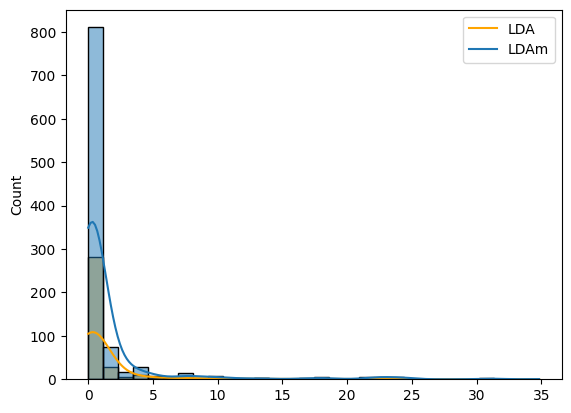

In [ ]:
#se procede con la grafica de distribuciones
plt.figure()
sns.histplot(LDA, kde=True, bins=30, color="orange",alpha=0.5, label='LDA')
sns.histplot(LDAm, kde=True, bins=30, color="blue",alpha=0.5, label='LDAm')
plt.legend(['LDA','LDAm'])
plt.show()

***Análisis de eventos de pérdida en la aseguradora: un enfoque de Montecarlo***

La base de datos de la aseguradora contiene *350 registros de eventos de pérdida* relacionados con la administración y ejecución de procesos. El análisis estadístico, con un 99.9% de confiabilidad según los estándares de Basilea, revela una alta precisión en la descripción de la distribución de pérdidas agregadas.

***Distribución de pérdidas:*** una mirada a la estructura
Los resultados indican una distribución con una "cola larga", evidenciada por:
* Coeficiente de asimetría de 4.95
* Coeficiente de curtosis de 27.80

Esto sugiere que, si bien la mayoría de las pérdidas son de baja magnitud, existen eventos extremos, aunque poco frecuentes, que pueden generar pérdidas significativas.

***Métricas clave:*** una visión detallada
* Pérdida promedio (media): 2.656 (valor relativamente bajo).
* Dispersión de los datos (desviación estándar): 13.089 (dispersión moderada).
* Precisión del muestreo (error de muestreo): 0.2142 (muestra representativa con bajo margen de error).

**Conclusiones:**

gestión de riesgos y aplicabilidad del análisis
El análisis sugiere que la aseguradora tiene una baja exposición al riesgo de pérdidas elevadas, ya que la mayoría de los eventos se concentran en valores bajos. No obstante, la presencia de eventos extremos implica que, aunque infrecuentes, existen casos de pérdidas significativas.

El método de muestreo de Montecarlo ha permitido ajustar la caracterización de la distribución, mostrando una leve reducción en los valores de asimetría y curtosis, pero manteniendo su estructura general. Esto valida la precisión del análisis y su utilidad en la gestión de riesgos de la aseguradora.

En resumen, el estudio proporciona información valiosa para la toma de decisiones en la gestión de riesgos de la aseguradora, permitiendo identificar áreas de oportunidad para fortalecer los controles y minimizar el impacto de posibles pérdidas